# import libraries

In [1]:
#default
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import cm
#threads
import multiprocessing
#pandas
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
#sklearn
from sklearn import svm, linear_model, model_selection
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold, GridSearchCV, ParameterGrid
from sklearn.inspection import permutation_importance
#toolkits
from mpl_toolkits.mplot3d import Axes3D
#default size plots
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# read data

In [29]:
df = pd.read_csv("C:\\mineria\\files\\temps.csv")
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


In [32]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


# analice data

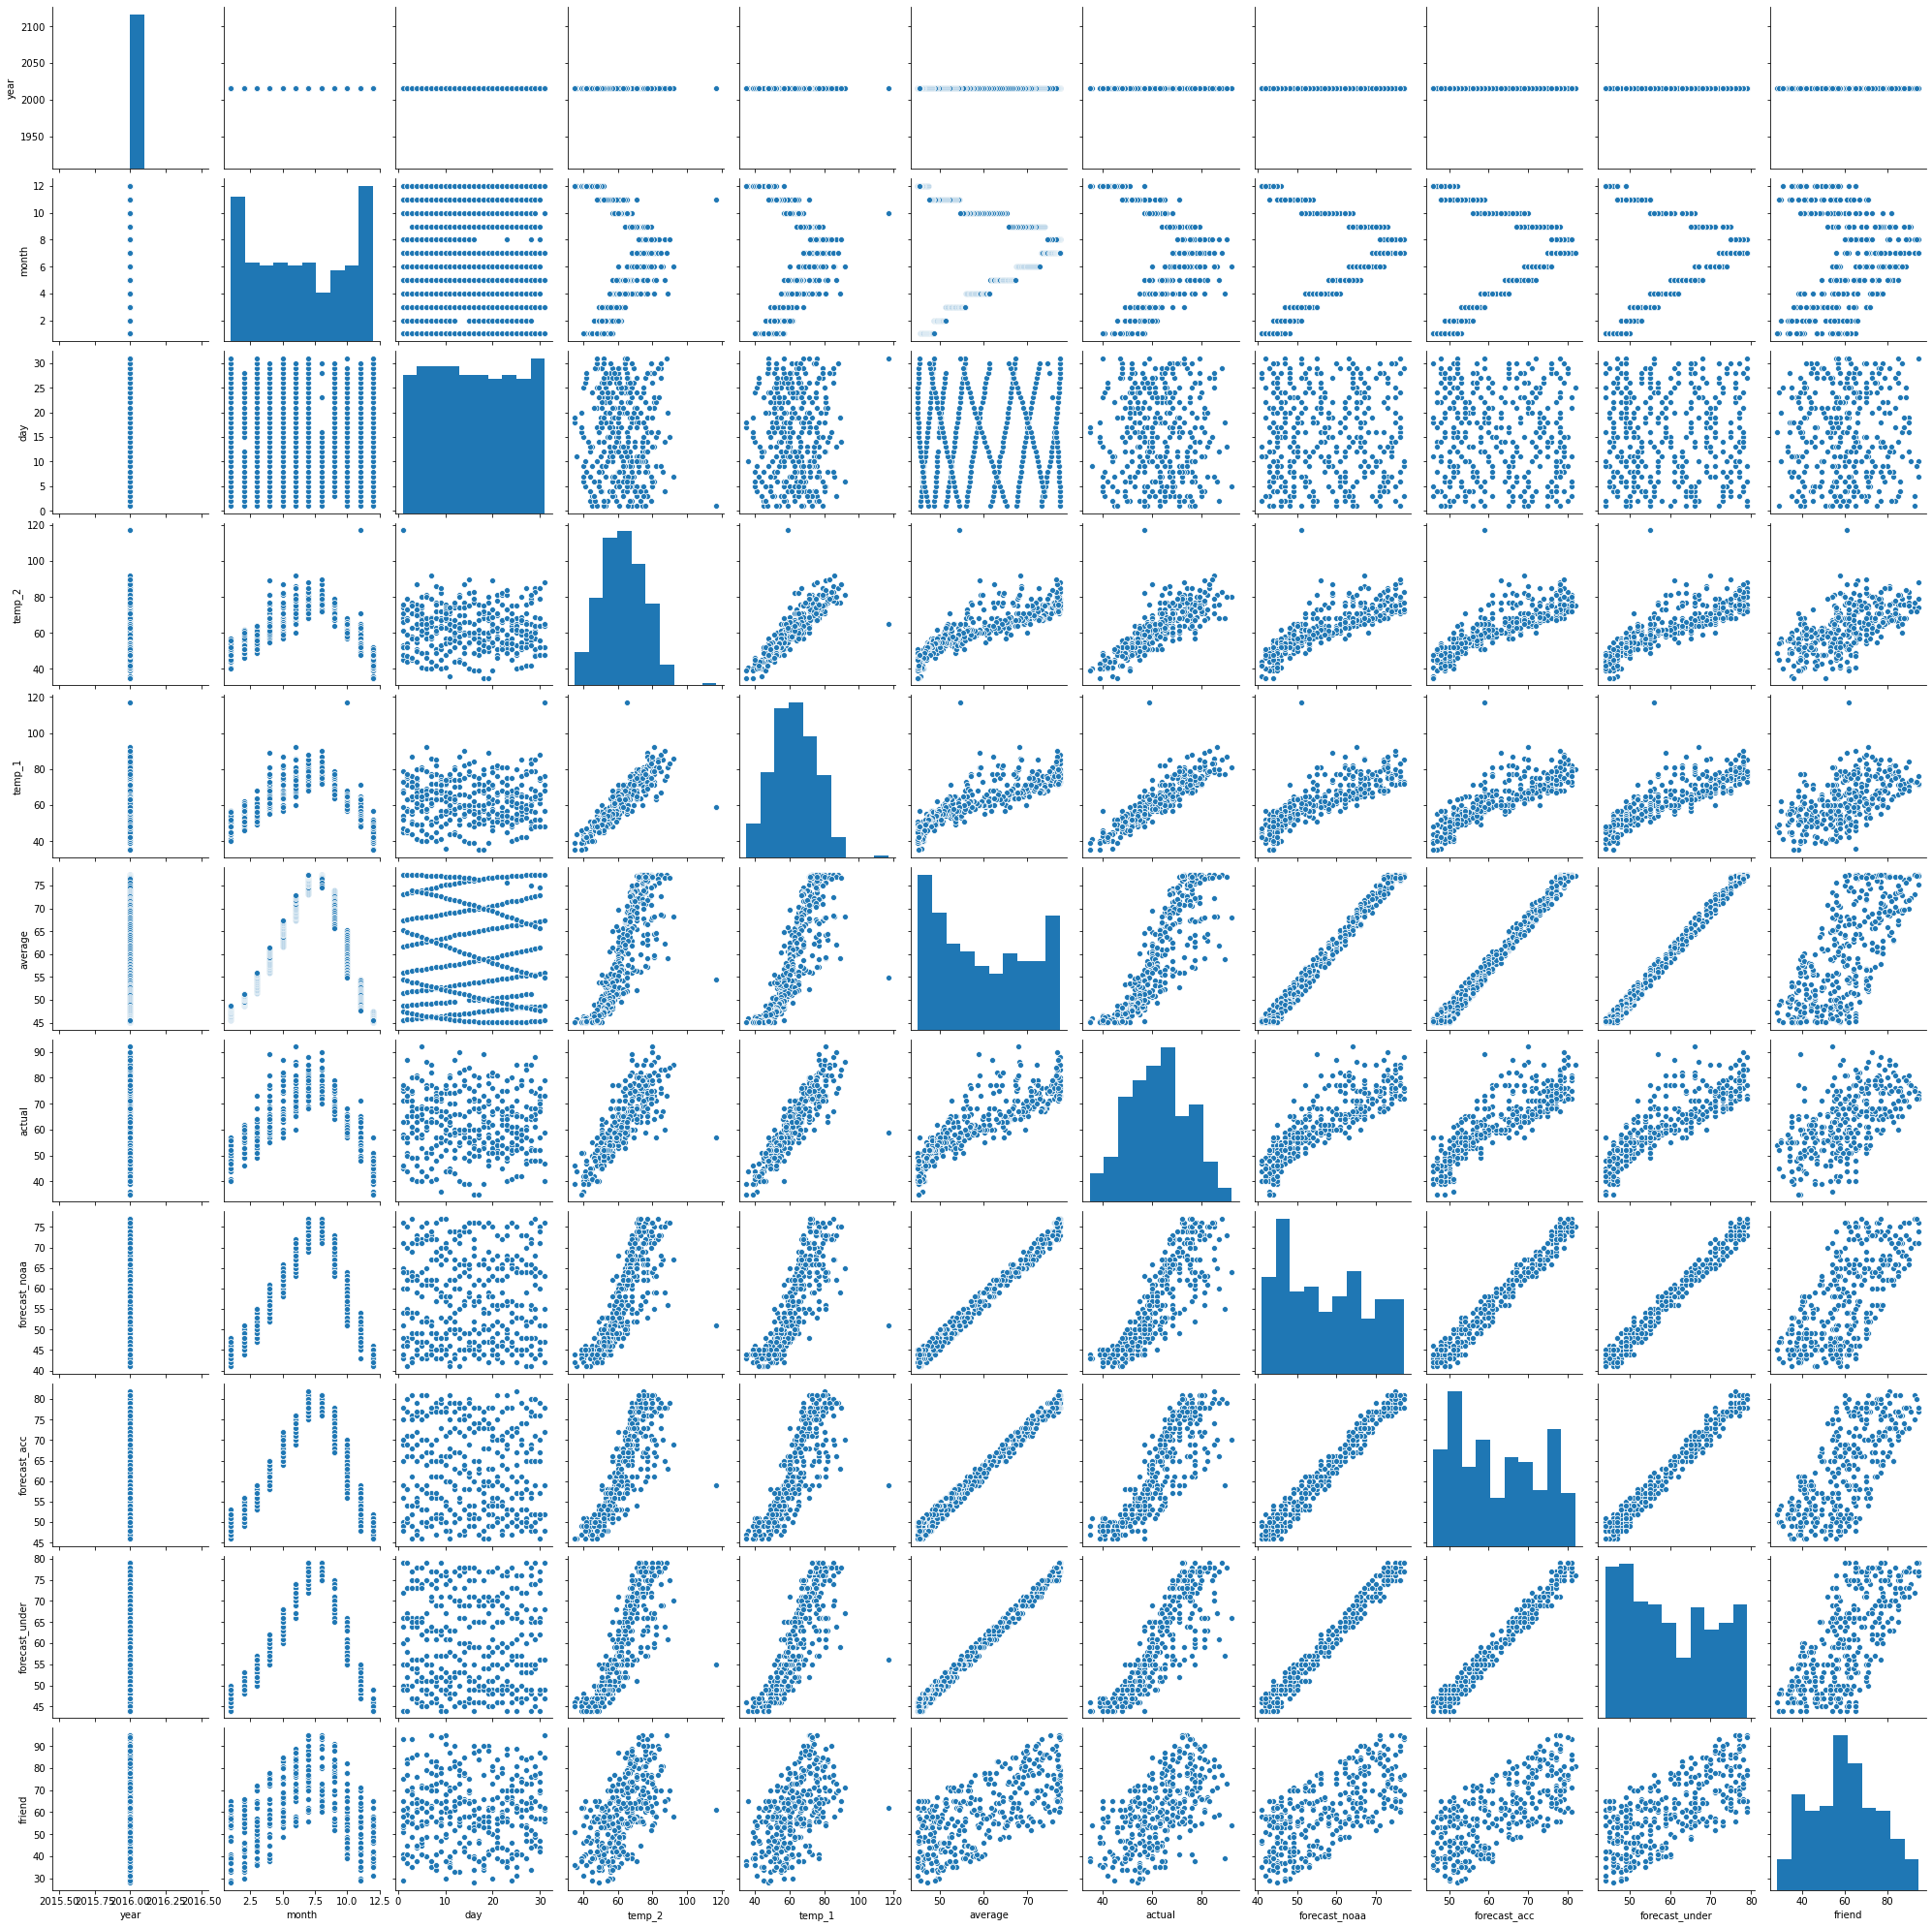

In [33]:
sns.pairplot(df)

# normalice data

In [36]:
df = pd.get_dummies(df)
df

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,41,50,47,47,0,0,0,0,0,1,0
344,2016,12,28,42,47,45.3,48,41,49,44,58,0,0,0,0,0,0,1
345,2016,12,29,47,48,45.3,48,43,50,45,65,0,0,0,0,1,0,0
346,2016,12,30,48,48,45.4,57,44,46,44,42,1,0,0,0,0,0,0


In [37]:
df[1:5]

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


# define data structure

In [42]:
y = df.actual
X = df[["year","month","day","year","temp_2","temp_1","average","actual","forecast_noaa","forecast_acc","forecast_under","friend", "week_Fri","week_Mon","week_Sat","week_Sun","week_Sun","week_Thurs", "week_Tues","week_Wed"]]

# Random forest

In [50]:
model = RandomForestRegressor(
            n_estimators = 1000,
            criterion    = 'mse',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 42
         )
model.fit(X,y)
predictions = model.predict(X)
print(model.score(X,y))

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation =train_test_split(X, y, test_size=validation_size, random_state=seed)


0.9999062906298462


# Regresion tree

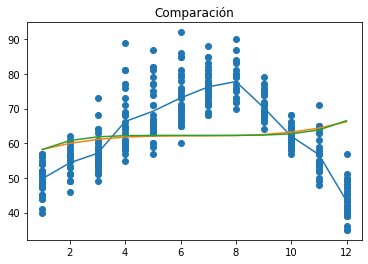

In [81]:
df["Y"] = df.actual

X = df.iloc[:,1:2].values  
Y = df.iloc[:,-1].values    

Y=Y.reshape(len(Y),1)

sc_X = StandardScaler()     
sc_Y = StandardScaler()     

X = sc_X.fit_transform(X)   
Y = sc_Y.fit_transform(Y)   

regressor = SVR(kernel='rbf') 
grado = 3
grado2 = 5                  
regressor1 = SVR(kernel ='poly', degree=grado) 
regressor2 = SVR(kernel ='poly', degree=grado2)

regressor.fit(X,Y.ravel())
regressor1.fit(X,Y.ravel())
regressor2.fit(X,Y.ravel())

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, Y)

sc_X.transform([[6.5]])
regressor.predict(sc_X.transform([[6.5]]))
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

label1 = 'Polinomio grado '+str(grado)
label2 = 'Polinomio grado '+str(grado2)
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y))
plt.plot(sc_X.inverse_transform(X), sc_Y.inverse_transform(regressor.predict(X)),  label ='rbf')
plt.plot(sc_X.inverse_transform(X), sc_Y.inverse_transform(regressor1.predict(X)),  label =label1 )
plt.plot(sc_X.inverse_transform(X), sc_Y.inverse_transform(regressor2.predict(X)),  label =label2 )
plt.title("Comparación")
plt.show()

In [75]:
df

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed,Y
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0,45
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0,44
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0,41
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0,40
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,41,50,47,47,0,0,0,0,0,1,0,47
344,2016,12,28,42,47,45.3,48,41,49,44,58,0,0,0,0,0,0,1,48
345,2016,12,29,47,48,45.3,48,43,50,45,65,0,0,0,0,1,0,0,48
346,2016,12,30,48,48,45.4,57,44,46,44,42,1,0,0,0,0,0,0,57


# Logistic Regression

In [82]:
y = df.actual
X = df[["year","month","day","year","temp_2","temp_1","average","actual","forecast_noaa","forecast_acc","forecast_under","friend", "week_Fri","week_Mon","week_Sat","week_Sun","week_Sun","week_Thurs", "week_Tues","week_Wed"]]

model = linear_model.LogisticRegression()
model.fit(X,y)
predictions = model.predict(X)
print(model.score(X,y))
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions)) # las que estan por fuera de la diagonal son las que hizo mal 
print(classification_report(Y_validation, predictions)) # soporte las validaciones, recall el % de acierto

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\Julian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

0.19540229885057472


C:\Users\Julian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Julian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Logistic Regression: 0.075265 (0.053855)
0.17142857142857143
[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

          35       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         2
          42       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         1
          48       0.00      0.00      0.00         3
          49       0.20      1.00      0.33         1
          50       0.00      0.00      0.00         2
          51       1.00      0.50      0.67         2
          52       0.33      0.50      0.40         4
          53       0.00      0.00      0.00         0
          54       0.20      0.33      0.25         3
        

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Julian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

# Linear regresion

In [94]:
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, Y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(Y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(Y_train, y_pred))

Coefficients: 
 [ 0.00000000e+00 -4.44452418e-16  3.70691759e-16 -5.55111512e-17
 -9.18408184e-17 -5.27322929e-16  6.82348913e-17  1.00000000e+00
 -9.29916674e-16  3.33932871e-16  3.09443398e-16  1.57806059e-16
 -8.71402378e-16 -1.89116976e-15  9.91055672e-16 -5.77632097e-16
 -5.77632097e-16  2.94765479e-16  1.78981853e-15  3.82152174e-16]
Independent term: 
 9.237055564881302e-14
Mean squared error: 0.00
Variance score: 1.00


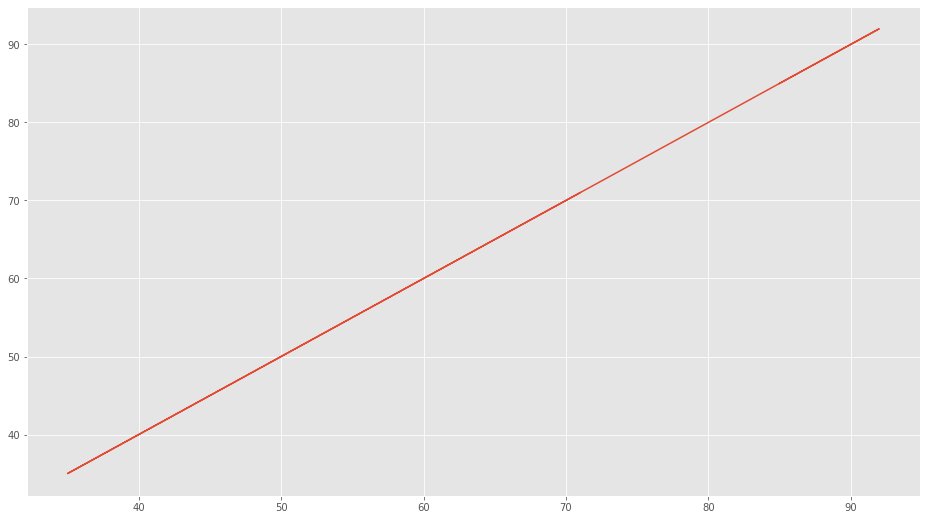

In [96]:
plt.plot(Y_train, y_pred)